In [48]:
import pandas as pd
file_path = 'processed_data.csv'
data = pd.read_csv(file_path)


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DateTime           52416 non-null  object 
 1   nhiet_do           52416 non-null  float64
 2   do_am              52416 non-null  float64
 3   toc_do_gio         52416 non-null  float64
 4   dong_buc_xa_chung  52416 non-null  float64
 5   dong_buc_xa_tx     52416 non-null  float64
 6   khu1               52416 non-null  float64
 7   khu2               52416 non-null  float64
 8   khu3               52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [49]:
# Lấy 504 bản ghi cuối cùng cho tập kiểm tra
data_test = data.tail(1008)

# Lấy phần còn lại cho tập huấn luyện (train)
data_train = data.iloc[:-1008]  # Từ đầu đến bản ghi trước bản ghi thứ 504 cuối cùng

In [50]:
from sklearn.preprocessing import MinMaxScaler
dt_numeric = data_train.drop(columns=['DateTime'])
scaler = MinMaxScaler()
scaler.fit(dt_numeric)

MinMaxScaler()

In [51]:
df_scaled = pd.DataFrame(scaler.fit_transform(dt_numeric), columns=dt_numeric.columns)

In [52]:
X = df_scaled[['nhiet_do',	'do_am', 'toc_do_gio',	'dong_buc_xa_chung', 'dong_buc_xa_tx']]  # Các biến đầu vào
y = df_scaled[['khu1']]

In [53]:
dt_numeric1 = data_test.drop(columns=['DateTime'])

In [54]:
df_scaleds = pd.DataFrame(scaler.fit_transform(dt_numeric1), columns=dt_numeric1.columns)

In [55]:
Xx = df_scaleds[['nhiet_do', 'do_am', 'toc_do_gio',	'dong_buc_xa_chung', 'dong_buc_xa_tx']]  # Các biến đầu vào
yy = df_scaleds[['khu1']]

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
X_rnn = X.values.reshape((X.shape[0], 1, X.shape[1]))
# Define the RNN model
# Xây dựng mô hình RNN
rnn_model = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(X_rnn.shape[1], X_rnn.shape[2])),  # Input với dữ liệu đã reshape
    Dense(1)
])
# Compile the model
rnn_model.compile(optimizer='adam', loss='mean_squared_error')


# Huấn luyện mô hình
history_rnn = rnn_model.fit(X_rnn, y, epochs=100, batch_size=64)


Epoch 1/100


D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 994us/step - loss: 0.0539 
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0264
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0260
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step - loss: 0.0262
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 946us/step - loss: 0.0259
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 928us/step - loss: 0.0257
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 937us/step - loss: 0.0257
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 945us/step - loss: 0.0256
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 936us/step - loss: 0.0253
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 950us/step - loss: 0.0254
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step - loss: 0.0253
Epoch 12/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0250
Epoch 13/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 980us/step - loss: 0.0252
Epoch 14/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 926us/step - loss: 0.0251
Epoch 15/100
804/804 ━━━━━━━━━━━

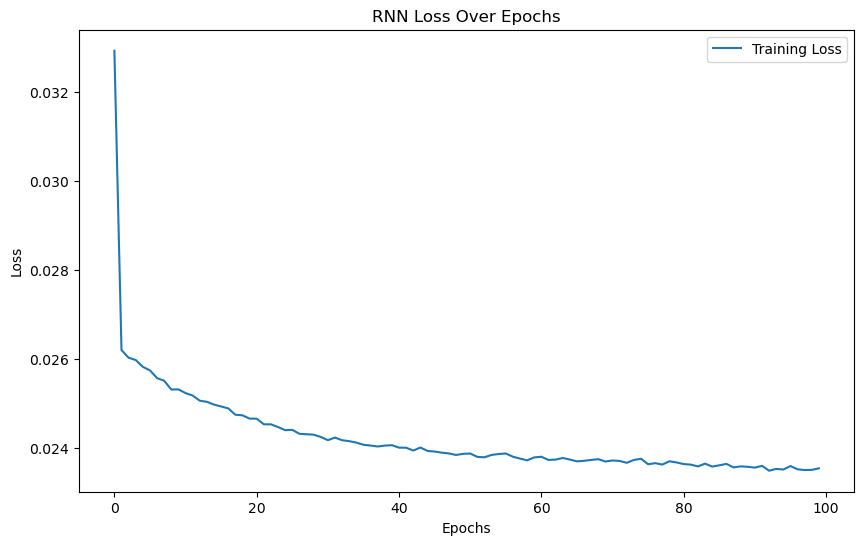

In [57]:
import matplotlib.pyplot as plt
# Vẽ biểu đồ loss qua các epoch
loss_per_epoch_rnn = history_rnn.history['loss']
val_loss_per_epoch_rnn = history_rnn.history.get('val_loss', [])

plt.figure(figsize=(10,6))
plt.plot(range(len(loss_per_epoch_rnn)), loss_per_epoch_rnn, label='Training Loss')
if val_loss_per_epoch_rnn:
    plt.plot(range(len(val_loss_per_epoch_rnn)), val_loss_per_epoch_rnn, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('RNN Loss Over Epochs')
plt.legend()
plt.show()

In [58]:
rnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 64)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,637 (53.27 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,092 (35.52 KB)

In [62]:
import numpy as np
# Thêm một chiều thời gian vào dữ liệu đầu vào
Xx_reshaped = np.expand_dims(Xx, axis=1)

In [64]:
# Dự đoán mức tiêu thụ điện năng trên tập kiểm tra
y_pred_rnn = rnn_model.predict(Xx_reshaped)

# Chuyển đổi dự đoán và giá trị thực tế thành DataFrame để dễ so sánh

resultss = pd.DataFrame({'Consumption': yy.values.flatten(), 'Predicted': y_pred_rnn.flatten()})
# Sắp xếp kết quả dự đoán theo giá trị thực tế (True)
results_sorteds = resultss.sort_index()
results_sorteds['datetime'] = data_test['DateTime'].values
results_sorteds = results_sorteds.set_index('datetime')
# Hiển thị kết quả đã sắp xếp
print(results_sorteds)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
                  Consumption  Predicted
datetime                                
12/24/2017 0:00      0.381348   0.245774
12/24/2017 0:10      0.358567   0.247798
12/24/2017 0:20      0.327954   0.267381
12/24/2017 0:30      0.303037   0.260212
12/24/2017 0:40      0.278832   0.257805
...                       ...        ...
12/30/2017 23:10     0.500237   0.263199
12/30/2017 23:20     0.471761   0.276737
12/30/2017 23:30     0.439013   0.301665
12/30/2017 23:40     0.414333   0.250251
12/30/2017 23:50     0.390603   0.246113

[1008 rows x 2 columns]


<Axes: xlabel='datetime'>

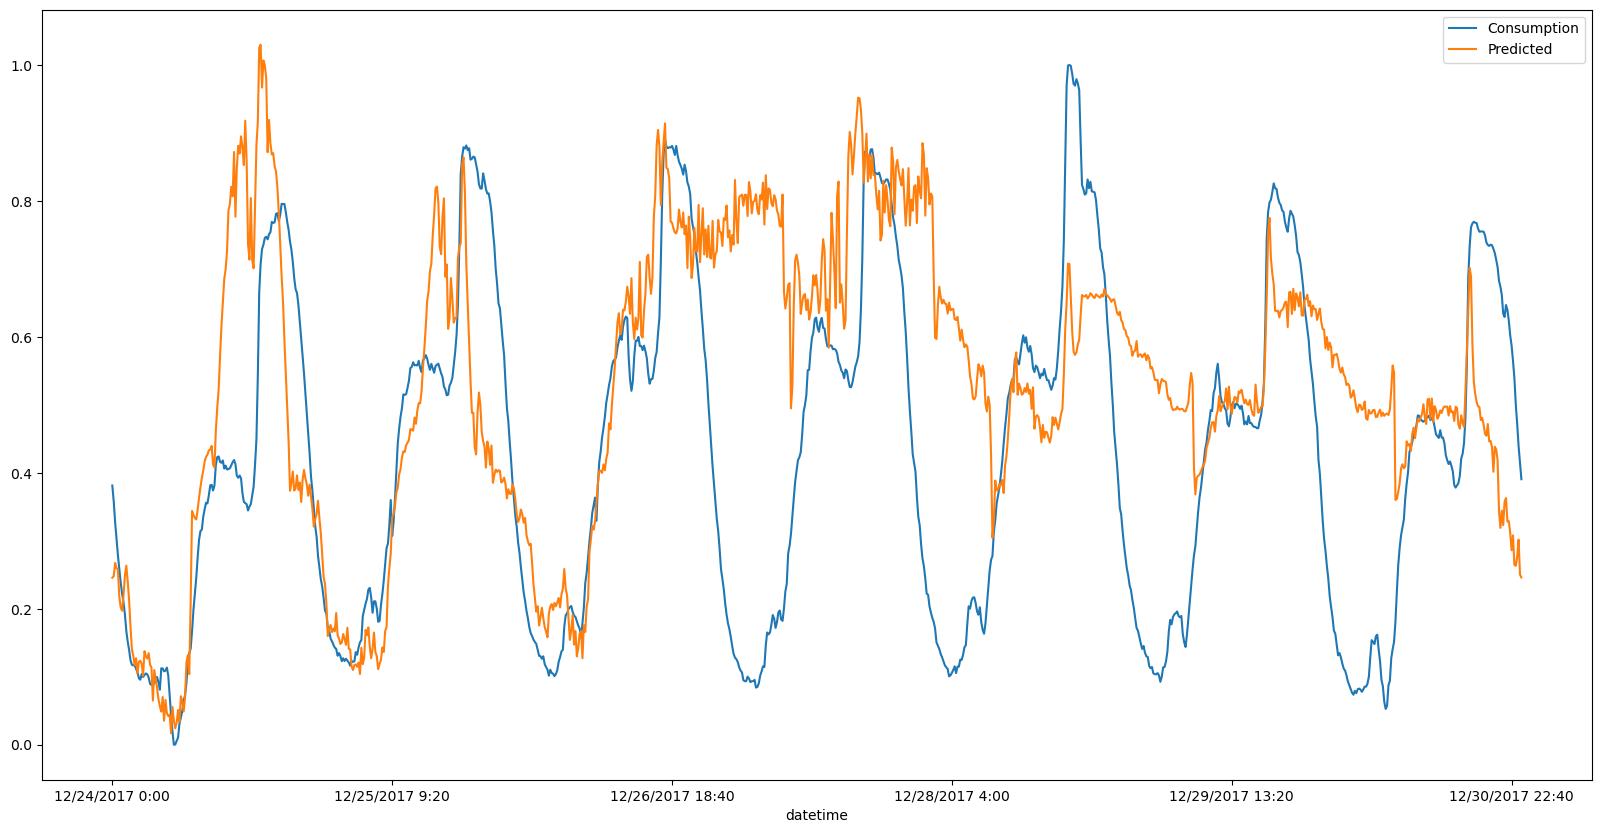

In [66]:
results_sorteds.plot(figsize=(20,10))